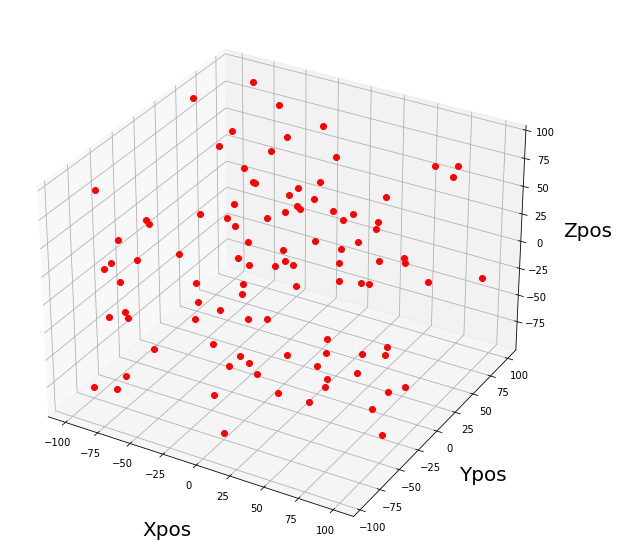

In [15]:
'''
Prompt:

Write a Barnes-Hut simulation code that can simulate gravitational interactions
between Saturn, Saturn’s moons, and at least 30,000 debris objects in Saturn’s 
rings.  Show that the presence of Saturn’s moons opens gaps in Saturn’s rings.
'''

# =================================================================================
# --------------------------------------------------------------------- IMPORTS ---
# =================================================================================

import random
import matplotlib.pyplot as plt
from matplotlib.axes._secondary_axes import SecondaryAxis

# =================================================================================
# ------------------------------------------------------------- PLOT AESTHETICS ---
# =================================================================================

plt.rcParams['figure.figsize'] = (10,10)

# =================================================================================
# --------------------------------------------------- CELESTIAL BODY PARAMETERS ---
# =================================================================================

'''
Author: Nicole Kerrison

IF INTERESTED IN PLOTTING TO SIZE...

The size of particles in Saturn's rings are 0.01 m to 10 m in diameter,
whereas Saturn's diameter is 1.1646e8 m. That's approximately 23268731X
larger than the particles composing the rings.

IF INTERESTED IN GETTING REAL POSITIONS AND VELOCITIES...

Visit https://ssd.jpl.nasa.gov/horizons.cgi for ephemerides.
'''

saturn_mass = 5.683e26 # -- in kg
saturn_pos  = (0,0,0) # -- placeholder, format may not be the same as below

moon1_mass  = 123 # -- more placeholders
moon1_pos   = 111

moon2_mass  = 345
moon2_pos   = 222

moon3_mass  = 567
moon3_pos   = 333

moon4_mass  = 789
moon4_pos   = 444

# =================================================================================
# ------------------------------------------------------------------- FUNCTIONS ---
# =================================================================================

'''
Author: Samuel Lyke
'''

def random_points(n): # -- CALLED IN main() FUNCTION ONLY
    
    '''
    Generates n random points.
    The P in the 0th spot inicates it is a point.
    '''
    
    coords = []
    for i in range(n):
        x = random.randint(-100, 100)
        y = random.randint(-100, 100)
        z = random.randint(-100, 100)
        coords.append(['P', x, y, z])
    return coords

# -------------------------

def median_val(vals): # -- CALLED IN divide_up() FUNCTION ONLY
    
    '''
    Calculates median of list.
    '''
    
    vals.sort()
    n = len(vals) / 2
    
    if len(vals) % 2 == 0:
        a = int(n - 1)
        b = int(n)
        return float(vals[a] + vals[b]) / 2
    
    else:
        n = int(n - 0.5)
        return vals[n]
    
# -------------------------

def divide_up(coords): # -- CALLED IN check_groups() and main() functions
    
    '''
    Sorts points into quadrants by coordinates relative to the median.
    If the n-th coordinate value < median, it will be on the left.
    Everything is clustered from x->y->z.
    Then will be passed through to specify more.
    '''
    
    clusters = [[[[], []], [[], []]], [[[], []], [[], []]]]
    x_vals = []
    y_vals = []
    z_vals = []
    
    for i in coords:
        x_vals.append(i[1])
        y_vals.append(i[2])
        z_vals.append(i[3])
    
    mids = [median_val(x_vals), median_val(y_vals), median_val(z_vals)]
    x_vals = []
    y_vals = []
    z_vals = []
    
    for i in coords:
        x_vals.append(i[1])
        y_vals.append(i[2])
        z_vals.append(i[3])
    
    for i in range(len(x_vals)):
        point = ['P', x_vals[i], y_vals[i], z_vals[i]]
        
        if x_vals[i] < mids[0]:
            
            if y_vals[i] < mids[1]:
                
                if z_vals[i] < mids[2]:
                    clusters[0][0][0].append(point)
                else:
                    clusters[0][0][1].append(point)
            
            else:
                
                if z_vals[i] < mids[2]:
                    clusters[0][1][0].append(point)
                else:
                    clusters[0][1][1].append(point)
        else:
            
            if y_vals[i] < mids[1]:
                
                if z_vals[i] < mids[2]:
                    clusters[1][0][0].append(point)
                else:
                    clusters[1][0][1].append(point)
            
            else:
                
                if z_vals[i] < mids[2]:
                    clusters[1][1][0].append(point)
                else:
                    clusters[1][1][1].append(point)
    
    clusters = check_groups(clusters)
    #print(clusters)
    return clusters

# -------------------------

def check_groups(data):
    
    '''
    Goes through each cluster and loops and divide.
    '''
    
    if len(data) > 0:
        
        if all_points(data) and len(data) > 1:
            data = divide_up(data)
        
        elif not all_points(data):
            new_data = []
            for i in data:
                new_data.append(check_groups(i))
            data = new_data
    
    return data

# -------------------------

def point_or_not(info):
    
    '''
    Checks to see if list is a point.
    '''
    
    if len(info) == 4:
        if type(info[0]) == type('P'):
            return True
    
    else:
        return False
    
# -------------------------

def all_points(info):
    
    '''
    Sees if list is all points.
    '''
    
    for i in info:
        if not point_or_not(i):
            return False
    return True

# -------------------------

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def display_points(coords, clusters):
    
    '''
    Plots the points.
    Edited by Nicole Kerrison to plot as 3D.
    '''
    
    for i in coords:
        ax.plot(i[1], i[2], i[3], marker='o', color='r')
    
    ax.set_xlabel("Xpos", fontsize=20, labelpad=25)
    ax.set_ylabel("Ypos", fontsize=20, labelpad=20)
    ax.set_zlabel("Zpos", fontsize=20, labelpad=20)
    
    #plt.axis([-100, 100, -100, 100])
    
# -------------------------

def main():
    
    # GENERATE POINTS
    coords = random_points(100)
    
    # 
    clusters = divide_up(coords)
    
    # PLOT
    display_points(coords, clusters)
    
# =================================================================================
# --------------------------------------------------------------------- PHYSICS ---
# =================================================================================

'''
Author: Nicole Kerrison
'''

# Invariant regardless of integration method.

def fx_fv(pos, vel, mass):

    fx = []
    fv = []

    for pos1, vel1, mass1 in zip(pos, vel, mass):

        accelArray = []

        fx += [vel1]

        for pos2, vel2, mass2  in zip(pos, vel, mass):

            if np.array_equal(pos1,pos2) == False:

                r = pos2 - pos1
                normr = np.linalg.norm(r)
                accel = G * mass2 * r / normr**3
                accelArray.append(accel)

            else:
                continue

        accelArray = np.array(accelArray)
        acceleration = accelArray.sum(axis=0)

        fv += [acceleration]

    return np.array(fx), np.array(fv)

# -------------------------

def energy(pos, vel, mass):

    Karray = []
    Uarray = []

    for pos1, vel1, mass1, i in zip(pos, vel, mass, range(len(mass))):

        kineticEnergy = 0.5 * mass1 * np.linalg.norm(vel1)**2
        Karray.append(kineticEnergy)

        for pos2, vel2, mass2, j in zip(pos, vel, mass, range(len(mass))):

            if j > i:
                
                r = pos2 - pos1
                potentialEnergy = - G * mass1 * mass2 / np.linalg.norm(r)
                Uarray.append(potentialEnergy)

            else:
                continue

    Htot = np.sum(Karray) + np.sum(Uarray)

    return Htot

# -------------------------

def momentum(pos, vel, mass):

    momentumArray = []

    for pos1, vel1, mass1 in zip(pos, vel, mass):
        momentum = mass1 * vel1
        momentumArray.append(momentum)

    momentumArray = np.array(momentumArray)
    momentum = momentumArray.sum(axis=0)
    momentum = np.linalg.norm(momentum)

    return momentum

# -------------------------

def angularMomentum(pos, vel, mass):

    Larray = []

    for pos1, vel1, mass1 in zip(pos, vel, mass):
        angularmomentum = mass1 * np.cross(pos1,vel1)
        Larray.append(angularmomentum)

    Larray = np.array(Larray)
    angularmomentum = Larray.sum(axis=0)
    angularmomentum = np.linalg.norm(angularmomentum)

    return angularmomentum

# =================================================================================
# ---------------------------------------------------------------- EULER METHOD ---
# =================================================================================

# REQUIRES ARRAYS OF INITIAL: POSITIONS (COMs), VELOCITIES, AS WELL AS MASS (MASS OF CLUSTER)

'''
x = []
y = []
m = []
H = []
P = []
L = []

maxTime = 1000
h = 0.01 # -- TIME STEP
t_range = int(maxTime/h)

pos = pos0
vel = vel0

for t in range(0, t_range+1):

    k1pos, k1vel = fx_fv(pos, vel, mass)

    pos = pos + k1pos * h
    vel = vel + k1vel * h

    x += [pos[:,0]]
    y += [pos[:,1]]
    m += [np.ravel(mass)]

    H.append(energy(pos, vel, mass))
    P.append(momentum(pos, vel, mass))
    L.append(angularMomentum(pos, vel, mass))
    '''

# =================================================================================
# ---------------------------------------------------- RUNS THE main() FUNCTION ---
# =================================================================================

main()